This code processes chlorophyll data from the AQUA satellite. This data is a subset of the Delaware Bay from -75 to -75.1 W and 39.05 to 39.15 N, 2005 to present (6MB).

The final processed code is analyzed in file 2.2 Chl Analysis and Model.

http://basin.ceoe.udel.edu/thredds/ncss/grid/Aqua1DayAggregate.nc/dataset.html

In [1]:
import pandas as pd
import datetime as dt
import urllib.request
import netCDF4
from netCDF4 import Dataset
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# This will create a dataframe with a multi-index with all of the dimensions in it.
# Unfortunately, Pandas doesn't support arbitrary metadata, so that will be lost in the conversion,
# but you can keep the ds around, and use the metadata from that. (StackOverflow)
ds = xr.open_dataset('Aqua1DayAggregate.nc')
aqua = ds.to_dataframe()

aqua = aqua.dropna(axis=0,how="any")
aqua = aqua.reset_index()
aqua.time = aqua.time.dt.floor("D")

aqua.head(5)

,lat,lon,time,chl_oc3
0,38.951027,-75.102821,2005-01-01,4.207506
1,38.951027,-75.102821,2005-01-27,6.131814
2,38.951027,-75.102821,2005-01-31,3.117054
3,38.951027,-75.102821,2005-02-01,4.390758
4,38.951027,-75.102821,2005-02-02,5.895270


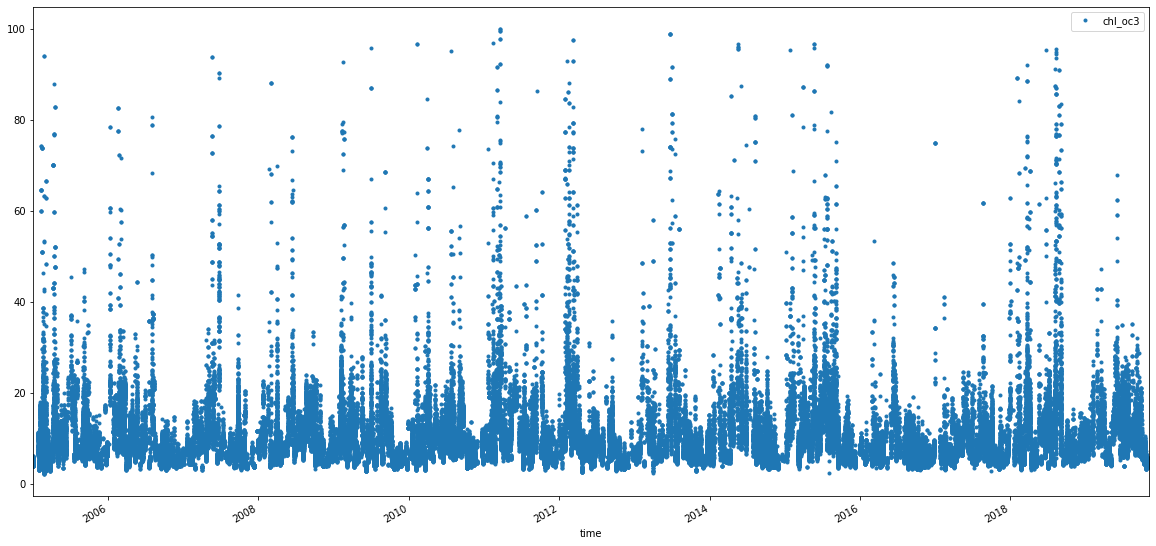

In [3]:
plot1 = aqua.plot('time','chl_oc3',figsize=(20, 10),style='.') #style='.'

# plot1.set_xlim(pd.Timestamp('2018-06-01'), pd.Timestamp('2018-10-01'))

In [4]:
# This code averages all the data points from a day
aqua_avg = aqua.copy()
aqua_avg = aqua_avg.set_index('time')
aqua_avg = aqua_avg.resample('D').mean()
aqua_avg = aqua_avg.dropna(axis=0,how="any")
aqua_avg = aqua_avg.reset_index()

aqua_avg.head(5)

,time,lat,lon,chl_oc3
0,2005-01-01,39.004431,-75.070147,4.853932
1,2005-01-27,38.993749,-75.074736,8.928359
2,2005-01-31,39.006094,-75.063613,4.105638
3,2005-02-01,39.010012,-75.077671,7.326336
4,2005-02-02,39.004438,-75.068246,8.445160


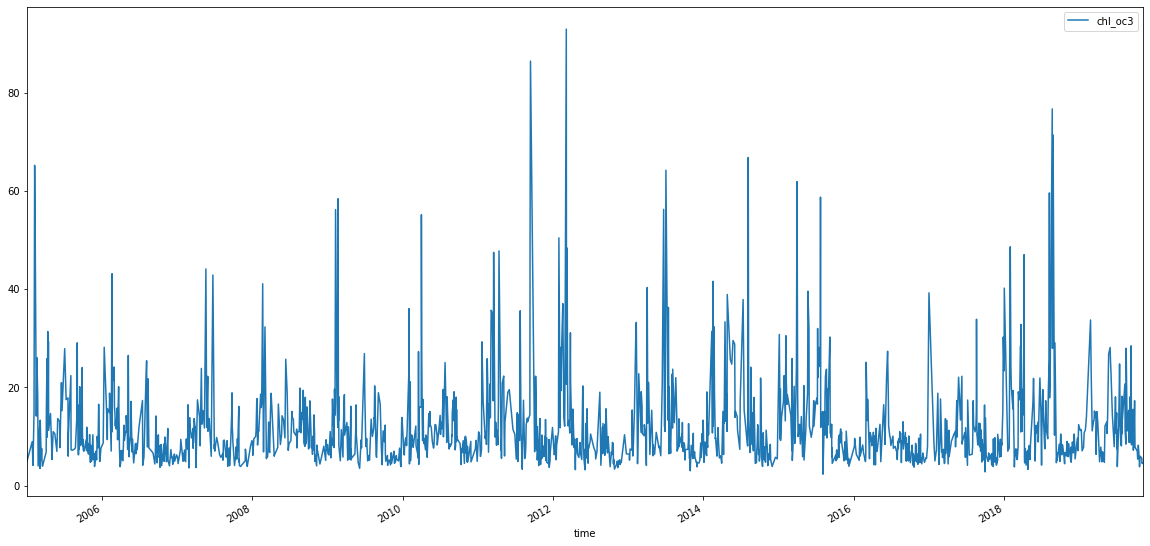

In [5]:
aqua_avg.plot('time','chl_oc3',figsize=(20, 10)) #style='.'

In [6]:
aqua_avg['avg_count'] = ""

In [7]:
counts = aqua.time.value_counts()
counts.sort_index(inplace=True)
counts = pd.DataFrame(counts)
counts = counts.reset_index()
counts.columns = ['time', 'count']

counts.head(5)

,time,count
0,2005-01-01,105
1,2005-01-27,89
2,2005-01-31,121
3,2005-02-01,76
4,2005-02-02,110


In [8]:
aqua_avg.head(5)

,time,lat,lon,chl_oc3,avg_count
0,2005-01-01,39.004431,-75.070147,4.853932,
1,2005-01-27,38.993749,-75.074736,8.928359,
2,2005-01-31,39.006094,-75.063613,4.105638,
3,2005-02-01,39.010012,-75.077671,7.326336,
4,2005-02-02,39.004438,-75.068246,8.445160,


In [9]:
aqua_avg.index.equals(counts.index)

True

In [10]:
aqua_avg['avg_count'] = counts['count'].values
aqua_avg

,time,lat,lon,chl_oc3,avg_count
0,2005-01-01,39.004431,-75.070147,4.853932,105
1,2005-01-27,38.993749,-75.074736,8.928359,89
2,2005-01-31,39.006094,-75.063613,4.105638,121
3,2005-02-01,39.010012,-75.077671,7.326336,76
4,2005-02-02,39.004438,-75.068246,8.445160,110
...,...,...,...,...,...
1526,2019-10-24,39.003894,-75.067814,5.976350,112
1527,2019-11-01,38.951027,-75.102821,5.547040,1
1528,2019-11-02,38.999865,-75.068076,4.527483,112
1529,2019-11-04,38.999388,-75.067901,4.587578,112


In [11]:
aqua_high = aqua_avg[aqua_avg['chl_oc3']>40].copy()
aqua_high

,time,lat,lon,chl_oc3,avg_count
6,2005-02-08,38.999227,-75.080276,65.205589,10
7,2005-02-11,38.963272,-75.089751,49.129658,15
110,2006-02-19,38.999612,-75.087628,43.148899,20
245,2007-05-21,39.000420,-75.089396,44.107861,46
254,2007-06-24,39.000383,-75.074679,42.868256,93
315,2008-02-21,38.958680,-75.100370,41.087528,4
413,2009-02-09,38.959376,-75.091236,56.193283,11
417,2009-02-21,39.036344,-75.093773,58.411442,13
520,2010-04-02,39.018874,-75.094297,55.142723,23
622,2011-03-19,38.983595,-75.057122,47.490112,74


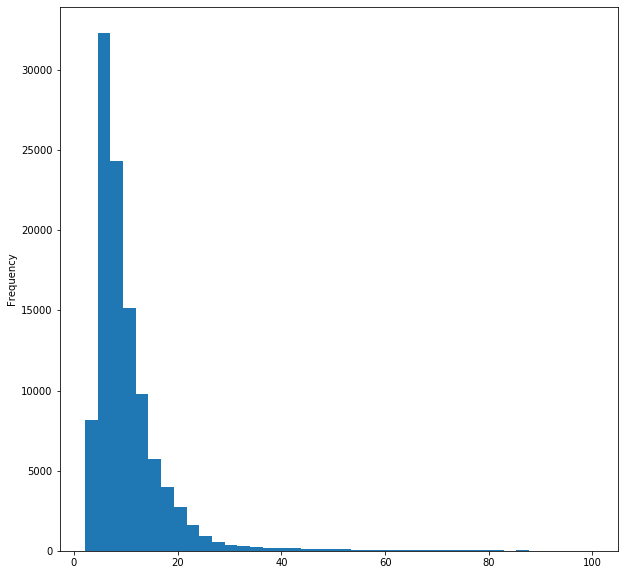

In [12]:
aqua['chl_oc3'].plot.hist(bins=40, figsize=(10, 10))

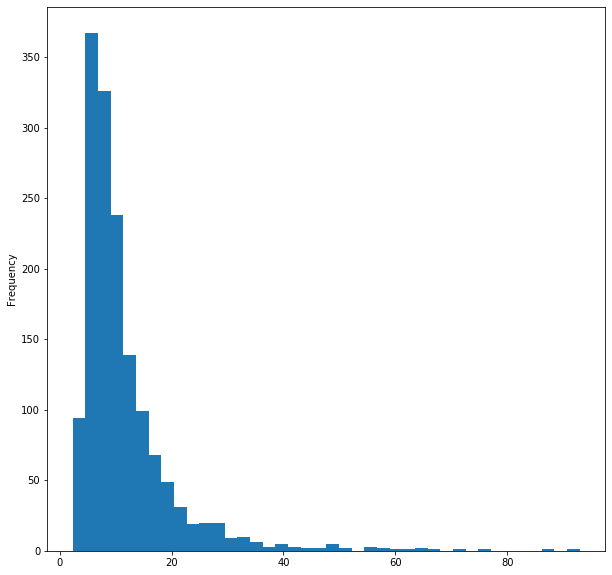

In [13]:
aqua_avg['chl_oc3'].plot.hist(bins=40, figsize=(10, 10))

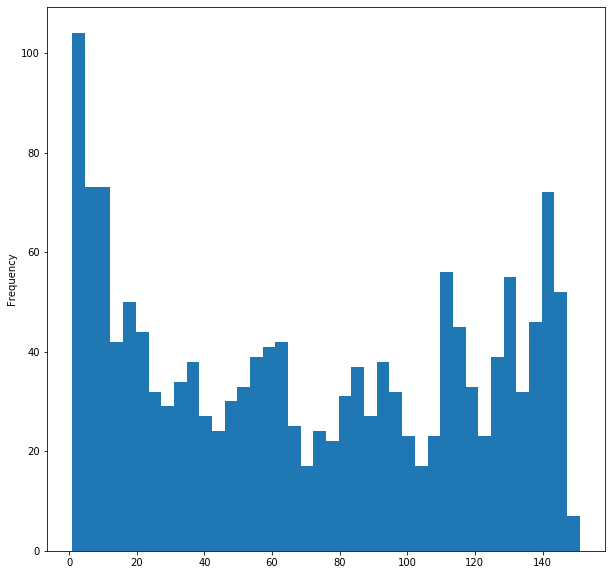

In [15]:
aqua_avg['avg_count'].plot.hist(bins=40, figsize=(10, 10))

(0.0, 60.0)

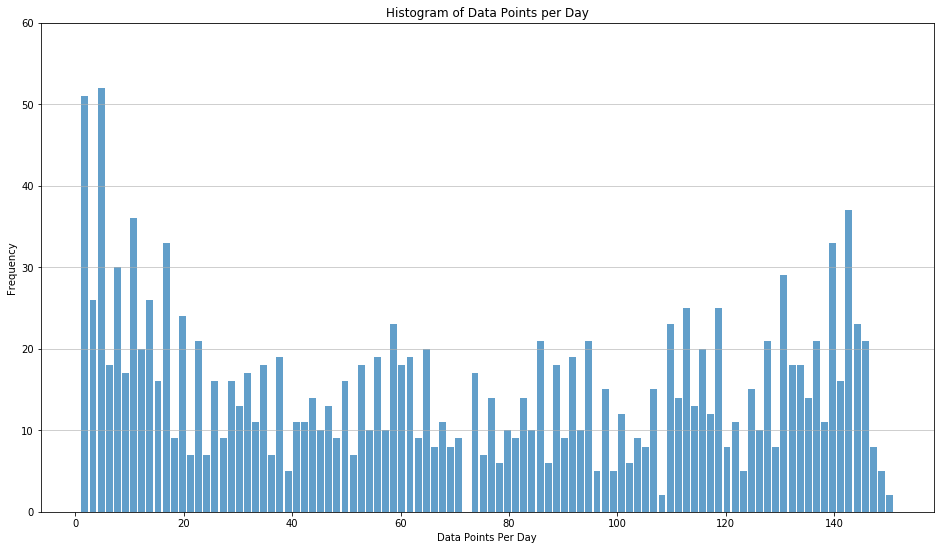

In [38]:
n, bins, patches = plt.hist(x=aqua_avg['avg_count'], bins=100, alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Data Points Per Day')
plt.ylabel('Frequency')
# plt.rcParams["figure.figsize"] = [16,9]
plt.title('Histogram of Data Points per Day')
# plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(736695.0, 737060.0)

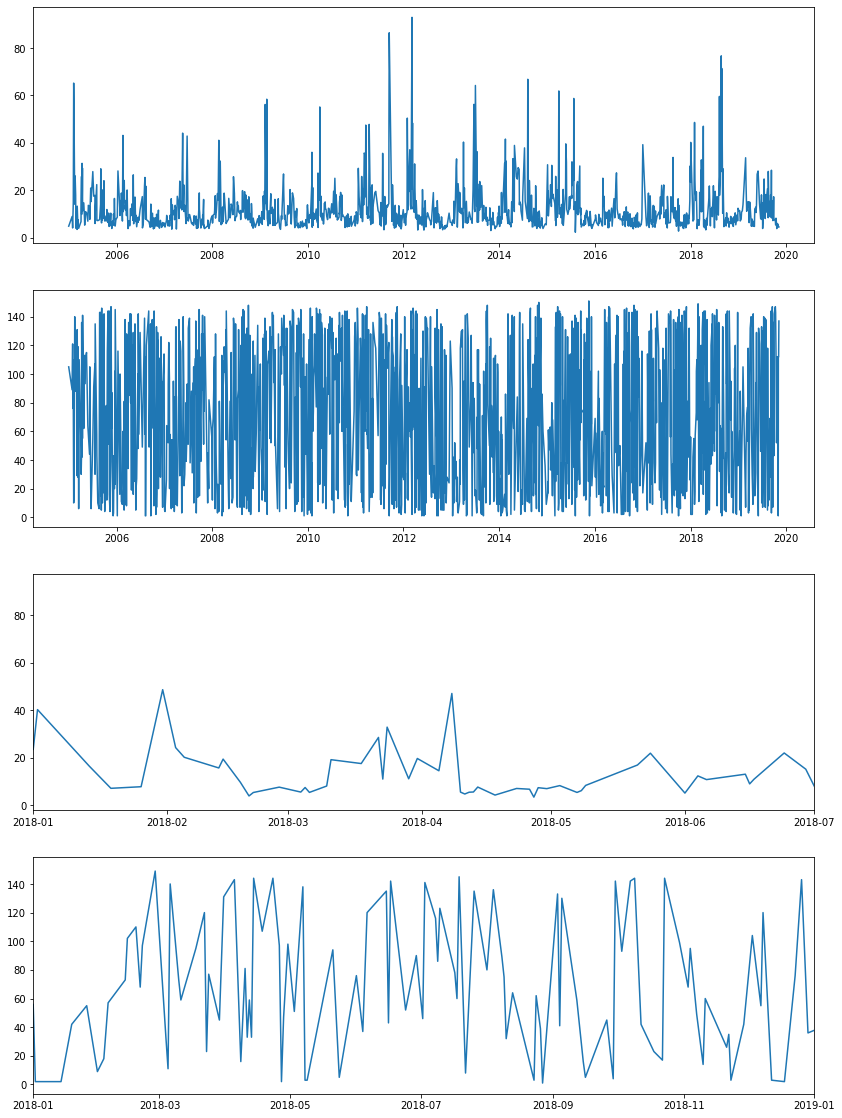

In [43]:
fig, ax = plt.subplots(nrows=4,ncols=1,figsize=(14,20))

# aqua_avg.time,'chl_oc3'
ax[0].plot(aqua_avg.time,aqua_avg.chl_oc3)
# ax[0].plot(t0,lowPassChl,c='r')

ax[1].plot(aqua_avg.time,aqua_avg.avg_count)
# ax[1].plot(t0,lowPassChl,c='r')
# ax[1].set_xlim(pd.Timestamp('2011-01-01'), pd.Timestamp('2013-01-01'))

ax[2].plot(aqua_avg.time,aqua_avg.chl_oc3)
# ax[2].plot(t0,lowPassChl,c='r')
ax[2].set_xlim(pd.Timestamp('2018-01-01'), pd.Timestamp('2018-07-01'))

ax[3].plot(aqua_avg.time,aqua_avg.avg_count)
# ax[3].plot(t0,lowPassChl,c='r')
ax[3].set_xlim(pd.Timestamp('2018-01-01'), pd.Timestamp('2019-01-01'))


# ax[0].legend(['original signal','low pass filtered'], fontsize=12,
#               loc='upper left',bbox_to_anchor=(0.02,1.4))
# for i in range(len(ax)): ax[i].set_ylabel('Chlora mg/m³', fontsize=11)
# for i in range(len(ax)): ax[i].grid()

# ax[3].set_xlabel('time', fontsize=14);
# ax[0].set_title('Delaware Bay Chlor - Low Pass Signal',fontsize=20)